<span style="font-size:2em;">Instructor: Dr. Qipei (Gavin) Mei (qipei.mei@ualberta.ca)</span>

<span style="font-size:2em;">Student Name: Mohammad Aqib </span>

<span style="font-size:2em;">CCID: 1836464</span>

# Practical Implementation of Machine learning Models [15 Marks]

1.1 Please explain how you can identify a High Bias (Low Variance) model? [2 Marks]

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
"A high bias model will have poor performance on the training data. It struggles to fit the training data well and may have high errors or low accuracy. This is because it oversimplifies the data.
"The model will also have poor performance on the test data. High bias models don't generalize well to new, unseen data, which leads to low accuracy and high errors on the test set. "



1.2 Give an example of a High Variance model. How do you fix the issue if the number of training samples stays the same? [2 Marks]

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
"A high variance model is one that is overly complex and is too flexible, resulting in it fitting the training data very closely, often to the point of capturing noise or random fluctuations in the data.
"This leads to good performance on the training data but poor generalization to new, unseen data. It can be fixed by simplifying the model or reducing the number of feautures or utilising K-fold cross validation. "

1.3 Why do we usually split the dataset into three instead of two? [2 Marks]

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
"Dataset is splitted into three parts namely Training set, Validation Set and Testing Set. The validation set is used to fine-tune the model and make decisions about its hyperparameters (e.g., learning rate, regularization strength). It helps assess the model's performance on data it hasn't seen during training and aids in preventing overfitting.
"By adjusting hyperparameters based on validation set performance, one can optimize the model's ability to generalize to new, unseen data.

1.4 List at least 3 different types of Cross-Validation techniques? What are their pros and cons. [2 Marks]

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
"1. K-Fold Cross-Validation:"
Pros: Provides a robust estimate of model performance, reduces overfitting, and can work well with smaller datasets.
Cons: Can be computationally expensive, as it requires fitting the model multiple times.

"2. Leave-One-Out Cross-Validation (LOOCV):"
Pros: Provides an unbiased estimate with a low bias, and it uses all data for training.
Cons: Can be computationally expensive and may not work well with large datasets.

"3. Stratified Cross-Validation:"
Pros: Ensures that each fold maintains the same class distribution, suitable for imbalanced datasets.
Cons: May not work well for small datasets, and it can be more computationally intensive compared to simple k-fold.

1.5 Why can regularization help overcome the overfitting issue in machine learning? [2 Marks]

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
"Regularization is a technique in machine learning that can help overcome the overfitting issue by adding a penalty term to the model's cost function."
"Overfitting occurs when a machine learning model captures noise and random fluctuations in the training data, leading to poor generalization on unseen data."
"Regularization addresses this problem by discouraging the model from fitting the training data too closely and instead encouraging it to find a simpler and more generalizable solution."


1.6 Assume that the house price is related to two factors, i.e. house size and number of bedrooms. We can use a multi-variate linear regression model to fit the data. The model is y=$\theta$<sub>0</sub>+$\theta$<sub>1</sub>x<sub>1</sub>+$\theta$<sub>2</sub>x<sub>2</sub> where y is the predicted house price, x<sub>1</sub> is the house size and x<sub>2</sub> is the number of bedrooms. Below are 15 data points for training and validation (different than the data given in Q1 of assignment 2).

House Size (sqft), x<sub>1</sub>|Number of Bedrooms, x<sub>2</sub> | House Price (CAD), y
-----|-----|-----
2132|3|460229
2258|3|516232
1642|2|386751
1332|2|307990
1743|3|415409
2456|3|600718
2688|4|648116
2842|4|672542
3012|5|771245
1437|2|320089
1285|2|294514
1129|1|241874
2524|3|600702
3313|5|782041
3523|5|873183

You are asked to implement 5-fold cross validation (repeat this 5 times: use 4 folds for training a linear regression model, and use the remaining fold for validation. Choose different folds for validation every time) either by yourself or using the KFold function in scikit-learn package. For each of the 5 rounds, you should report the R2 value of the model on the validation fold (you can directly use score function of the linear regression model to output this). Also, report the average of all 5 R2 values. **Note: For marking purpose, please do not shuffle the data before you implement the 5-fold cross validation.** [5 Marks]

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Input data, shuffling is not done.
house_size = np.array([2132, 2258, 1642, 1332, 1743, 2456, 2688, 2842, 3012, 1437, 1285, 1129, 2524, 3313, 3523])
num_bedrooms = np.array([3, 3, 2, 2, 3, 3, 4, 4, 5, 2, 2, 1, 3, 5, 5])
house_price = np.array([460229, 516232, 386751, 307990, 415409, 600718, 648116, 672542, 771245, 320089, 294514, 241874, 600702, 782041, 873183])

# Combine features into a single array
X = np.vstack((house_size, num_bedrooms)).T
y = house_price

# Initialize variables to store R2 values and the total R2
r2_values = []
total_r2 = 0

# Perform 5-fold cross-validation.
kf = KFold(n_splits=5, shuffle=True,  random_state =42)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate the R2 score
    r2 = r2_score(y_val, y_pred)
    r2_values.append(r2)
    total_r2 += r2

# Calculate the average R2 value
average_r2 = total_r2 / len(r2_values)

# Report R2 values for each fold and the average
print("R2 values for each fold:", r2_values)
print("Average R2:", average_r2)


R2 values for each fold: [0.903011195895669, 0.8807970127020254, 0.9939571220343725, 0.9968391753604774, 0.9980357972331357]
Average R2: 0.9545280606451361


# Support Vector Machine [15 Marks]
Build a support vector machine model for the following classification problem. The input features are x<sub>1</sub> and x<sub>2</sub>, and output is y where 0 and 1 represent two different categories. The data below is the same as Q2 of assignment 2.

x<sub>1</sub>|x<sub>2</sub> |y
-----|-----|-----
1.35|0.311|0
2.019|0.687|1
1.659|1.247|1
1.566|0.323|0
1.74|0.765|1
1.603|0.924|1
2.194|-0.401|0
1.202|1.581|1
1.93|1.052|1
1.196|1.544|1
2.021|-0.157|0
1.32|0.272|0
1.823|1.062|1
1.169|0.734|0
1.226|1.771|1
1.107|0.78|0
2.031|-0.354|0
1.487|1.272|1
1.921|0.011|0
1.932|0.994|1
1.59|-0.056|0
1.758|0.142|0

Answer the following questions (**Please note you will not get credit if you do not use the methods as specified**):

2.1 What is the difference between Hard Margin SVM and Soft Margin SVM? [3 Marks]

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
"Hard Margin SVM and Soft Margin SVM lies in their approach to handling misclassified points and outliers."
"Hard Margin SVM aims for strict, noise-free separation, while Soft Margin SVM prioritizes robustness by allowing for a limited number of misclassifications. "
"The choice between them depends on the nature of the data and the tolerance for classification errors in the application."

2.2 Use **python package** scikit-learn to find the optimal **linear kernel** support vector machine model to classify the data, and draw the decision boundary together with the data points. [5 Marks]

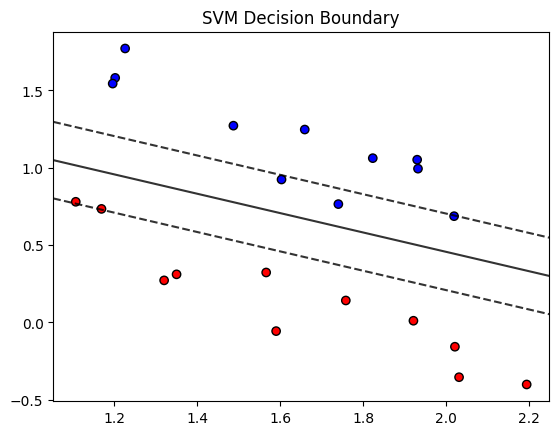

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Input data
X = np.array([[1.35, 0.311],
              [2.019, 0.687],
              [1.659, 1.247],
              [1.566, 0.323],
              [1.74, 0.765],
              [1.603, 0.924],
              [2.194, -0.401],
              [1.202, 1.581],
              [1.93, 1.052],
              [1.196, 1.544],
              [2.021, -0.157],
              [1.32, 0.272],
              [1.823, 1.062],
              [1.169, 0.734],
              [1.226, 1.771],
              [1.107, 0.78],
              [2.031, -0.354],
              [1.487, 1.272],
              [1.921, 0.011],
              [1.932, 0.994],
              [1.59, -0.056],
              [1.758, 0.142]])

y = np.array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])


# Create a linear SVM model
clf = svm.SVC(kernel='linear')

# Fit the model to the data
clf.fit(X, y)

colors = ['red' if label == 0 else 'blue' for label in y]
# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=colors,marker='o', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-0.5, 0, 0.5], alpha=0.8, linestyles=['--', '-', '--'])
plt.title('SVM Decision Boundary')
plt.show()


2.3. Compare and comment on the decision boundaries obtained from questions 2.2 and from the logistic regression model you got from the last assignment. Have you observed any decision boundary improvement? If not, what could be the reason? [2 Marks]

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
"The decision boundaries created by SVM are more efficient as they consider support vectors to create a line which maximises distance between support vectors."
"The decision boundary created by logistic regression using the gradient descent resembles to be better than the one created by SVM over here."
"Here,decision boundary created by SVM does not seems to be generalised and could predict wrong class for unseen data. The performance of SVM is sensitive to hyperparameter such as choice of kernel(here linear is used), regularisation parameter, and someimes need hyperparameter tuning."

2.4 Add one more data point x<sub>1</sub>=1.92, x<sub>2</sub>=0.66, and y=0 to the dataset given in the question. Investigate how the regularization parameter affects the decision boundary. Summarize and comment on your results. **Note: You are allowed to use scikit-learn for this question.** [5 Marks]

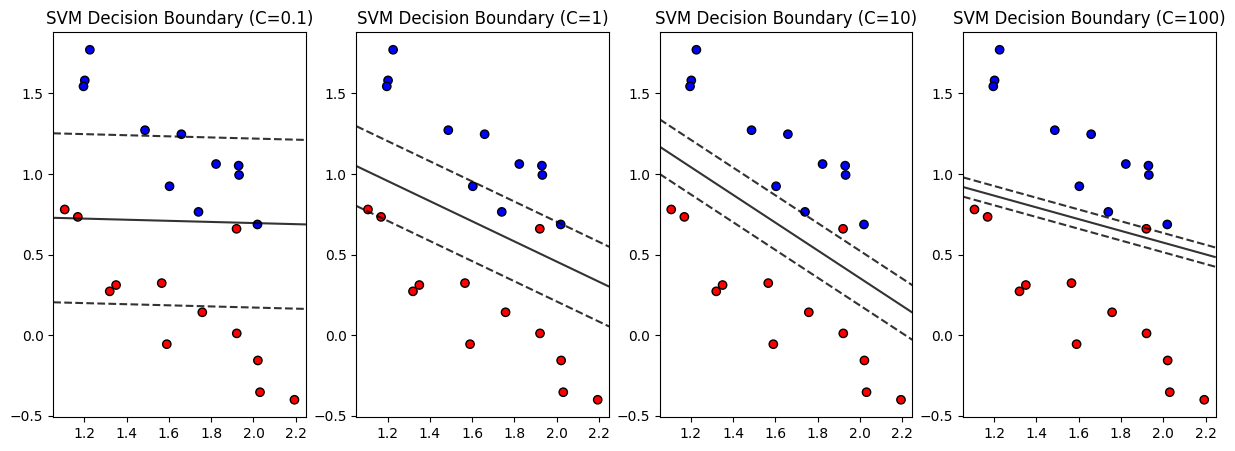

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Existing data
X = np.array([[1.35, 0.311],
              [2.019, 0.687],
              [1.659, 1.247],
              [1.566, 0.323],
              [1.74, 0.765],
              [1.603, 0.924],
              [2.194, -0.401],
              [1.202, 1.581],
              [1.93, 1.052],
              [1.196, 1.544],
              [2.021, -0.157],
              [1.32, 0.272],
              [1.823, 1.062],
              [1.169, 0.734],
              [1.226, 1.771],
              [1.107, 0.78],
              [2.031, -0.354],
              [1.487, 1.272],
              [1.921, 0.011],
              [1.932, 0.994],
              [1.59, -0.056],
              [1.758, 0.142]])

y = np.array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

# Additional data point
X = np.vstack([X, [1.92, 0.66]])
y = np.append(y, 0)
colors = ['red' if label == 0 else 'blue' for label in y]
# Regularization parameter values to investigate
C_values = [0.1,1,10,100]

# Create subplots for each value of C
fig, subplots = plt.subplots(1, len(C_values), figsize=(15, 5))
for i, C in enumerate(C_values):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Plot the decision boundary
    plt.subplot(1, len(C_values), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=colors, marker = 'o', edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-0.5, 0, 0.5], alpha=0.8, linestyles=['--', '-', '--'])
    plt.title(f'SVM Decision Boundary (C={C})')

plt.show()


In [ ]:
"After playing around with regularisation paramter it was found that with increase of regualrisation parameter (i.e from 0.1 to 500), model tends to overtfit over the training data. High value of reularisation parameter could prove disastrous for unseen data."
"Model with low regularisation parameter(i.e 0.1) seems to underfit over the training data. Therefore, optimal value of reglarisation parameter could prove useful in generalising the model."